In [1]:
# 12.5 Lab: Unsupervised Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
from ISLP import load_data
from ISLP.cluster import compute_linkage

In [2]:
# Principal Components Analysis
USArrests = get_rdataset('USArrests').data
scaler = StandardScaler()
USArrests_scaled = scaler.fit_transform(USArrests)
pcaUS = PCA()
scores = pcaUS.fit_transform(USArrests_scaled)

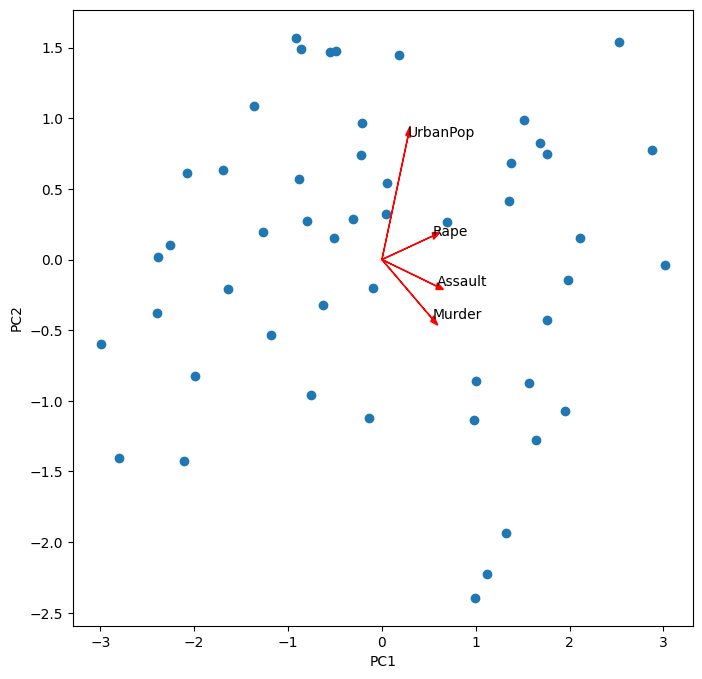

In [3]:
# Plotting PCs
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[0, k], pcaUS.components_[1, k], color='r', head_width=0.05)
    ax.text(pcaUS.components_[0, k], pcaUS.components_[1, k], USArrests.columns[k])

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

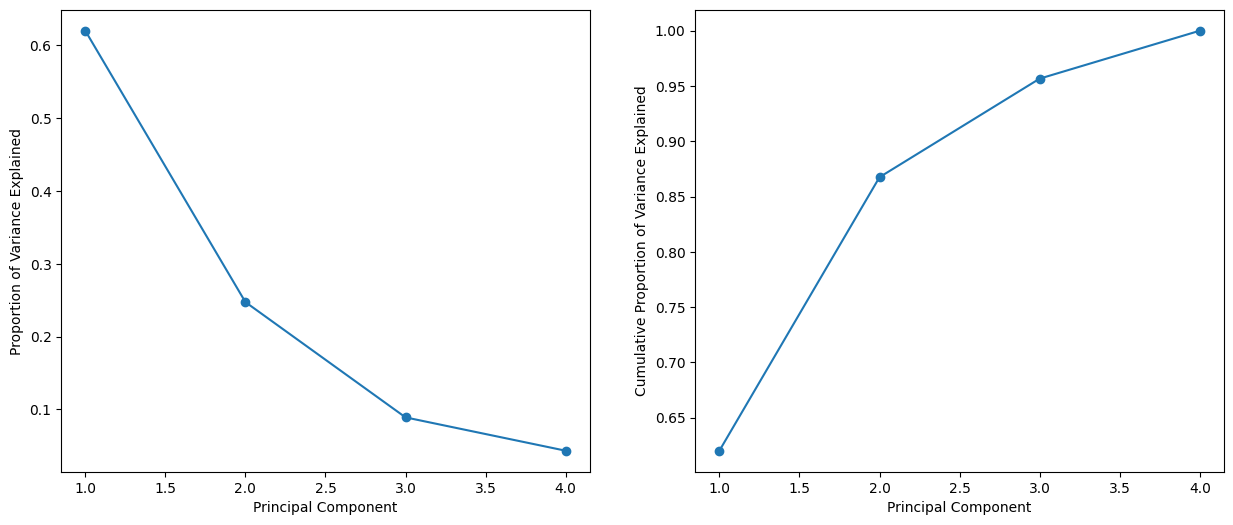

In [4]:
# Scree plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(1, pcaUS.n_components_ + 1)
axes[0].plot(ticks, pcaUS.explained_variance_ratio_, marker='o')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Proportion of Variance Explained')
axes[1].plot(ticks, np.cumsum(pcaUS.explained_variance_ratio_), marker='o')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Cumulative Proportion of Variance Explained')

In [5]:
# =============================
# 12.5.2 Matrix Completion
# =============================

X = USArrests_scaled
U, D, Vt = np.linalg.svd(X, full_matrices=False)

In [6]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]), n_omit, replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]), n_omit, replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan

In [7]:
def low_rank(X, M=1):
    U, D, Vt = np.linalg.svd(X, full_matrices=False)
    L = U[:, :M] * D[:M]
    return np.dot(L, Vt[:M])

Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]

In [8]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)

In [9]:
while rel_err > thresh:
    count += 1
    Xapp = low_rank(Xhat, M=1)
    Xhat[ismiss] = Xapp[ismiss]
    mss = np.mean((Xna[~ismiss] - Xapp[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print(f"Iteration: {count}, MSS: {mss:.3f}, Rel.Err: {rel_err:.2e}")

Iteration: 1, MSS: 0.395, Rel.Err: 5.99e-01
Iteration: 2, MSS: 0.382, Rel.Err: 1.33e-02
Iteration: 3, MSS: 0.381, Rel.Err: 1.44e-03
Iteration: 4, MSS: 0.381, Rel.Err: 1.79e-04
Iteration: 5, MSS: 0.381, Rel.Err: 2.58e-05
Iteration: 6, MSS: 0.381, Rel.Err: 4.22e-06
Iteration: 7, MSS: 0.381, Rel.Err: 7.65e-07
Iteration: 8, MSS: 0.381, Rel.Err: 1.48e-07
Iteration: 9, MSS: 0.381, Rel.Err: 2.95e-08


In [10]:
# =============================
# 12.5.3 Clustering
# =============================

np.random.seed(0)
X = np.random.standard_normal((50, 2))
X[:25, 0] += 3
X[:25, 1] -= 4

Text(0.5, 1.0, 'K-Means Clustering with K=2')

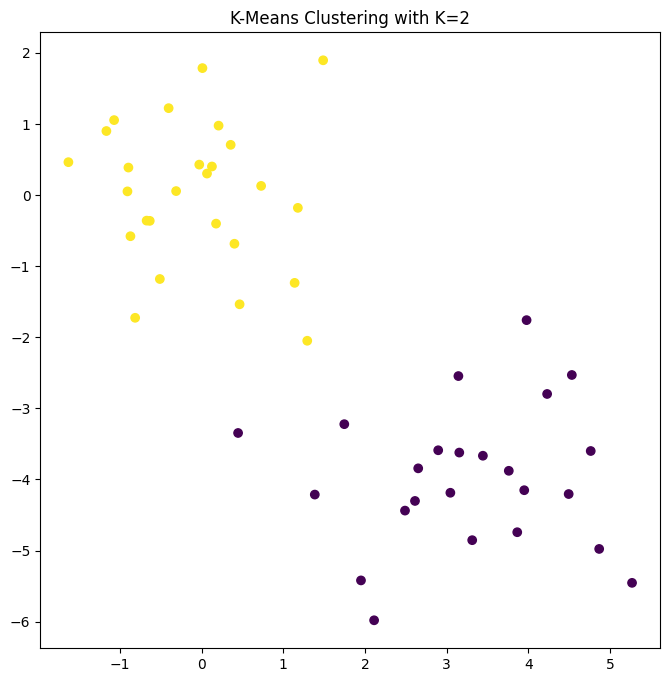

In [11]:
kmeans = KMeans(n_clusters=2, random_state=2, n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
ax.set_title("K-Means Clustering with K=2")

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [80.0, 80.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [160.0, 160.0, 190.0, 190.0],
  [140.0, 140.0, 175.0, 175.0],
  [95.0, 95.0, 157.5, 157.5],
  [28.125, 28.125, 126.25, 126.25],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [252.5, 252.5, 280.0, 280.0],
  [222.5, 222.5, 266.25, 266.25],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [375.0, 375.0, 385.0, 38

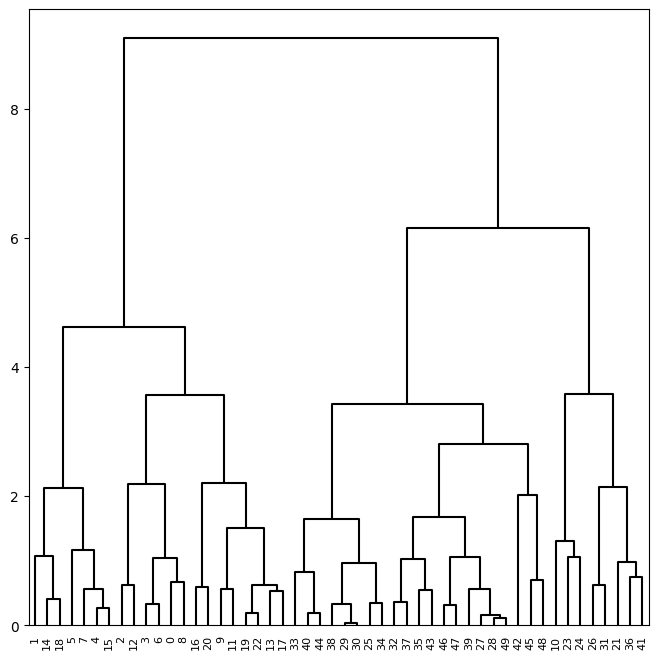

In [12]:
# Hierarchical Clustering
HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0, n_clusters=None, linkage='complete').fit(X)
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, color_threshold=-np.inf, above_threshold_color='black')

In [13]:
# =============================
# 12.5.4 NCI60 Data Example
# =============================

NCI60 = load_data('NCI60')
nci_labs = NCI60['labels']
nci_data = NCI60['data']

In [14]:
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(nci_scaled)

In [15]:
cancer_types = list(np.unique(nci_labs))
nci_groups = np.array([cancer_types.index(lab) for lab in nci_labs.values])

Text(0, 0.5, 'PC3')

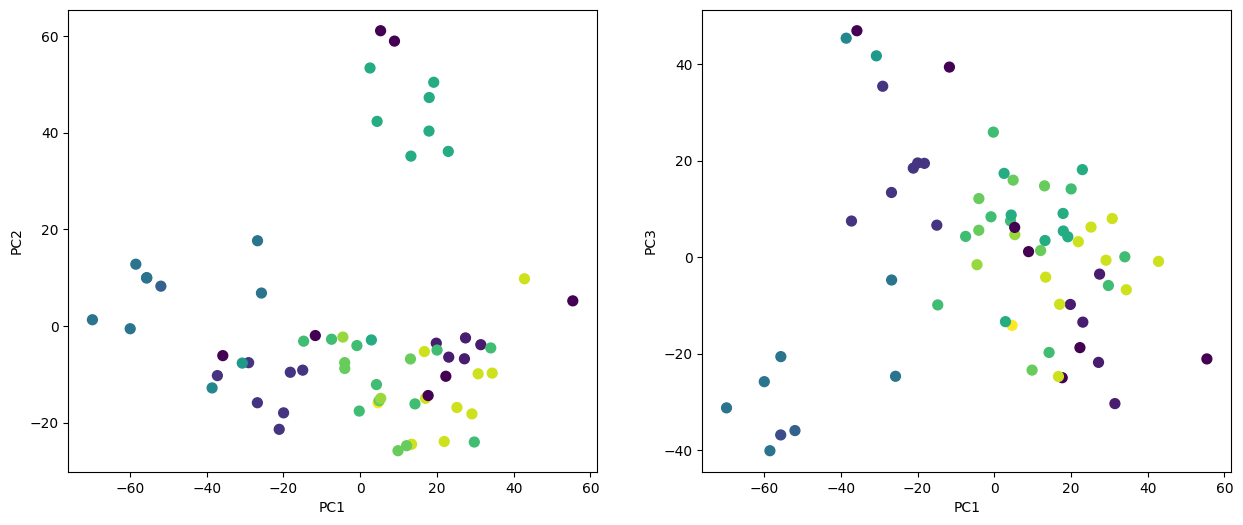

In [16]:
ig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].scatter(nci_scores[:, 0], nci_scores[:, 1], c=nci_groups, s=50)
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[1].scatter(nci_scores[:, 0], nci_scores[:, 2], c=nci_groups, s=50)
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC3")

Text(0, 0.5, 'Cumulative PVE')

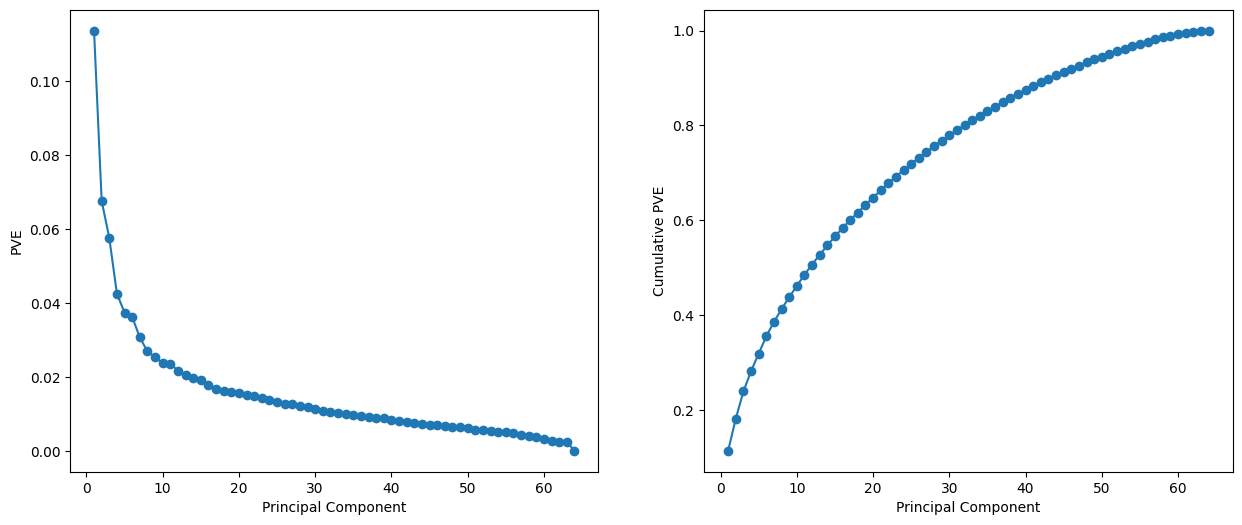

In [17]:
# Scree Plot for NCI60
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(1, nci_pca.n_components_ + 1)
axes[0].plot(ticks, nci_pca.explained_variance_ratio_, marker='o')
axes[0].set_xlabel("Principal Component")
axes[0].set_ylabel("PVE")
axes[1].plot(ticks, np.cumsum(nci_pca.explained_variance_ratio_), marker='o')
axes[1].set_xlabel("Principal Component")
axes[1].set_ylabel("Cumulative PVE")

Complete-PCA,0,1,2,3
label,,,,
BREAST,0,5,0,2
CNS,2,3,0,0
COLON,7,0,0,0
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,2,0,4,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,1,7,0,0


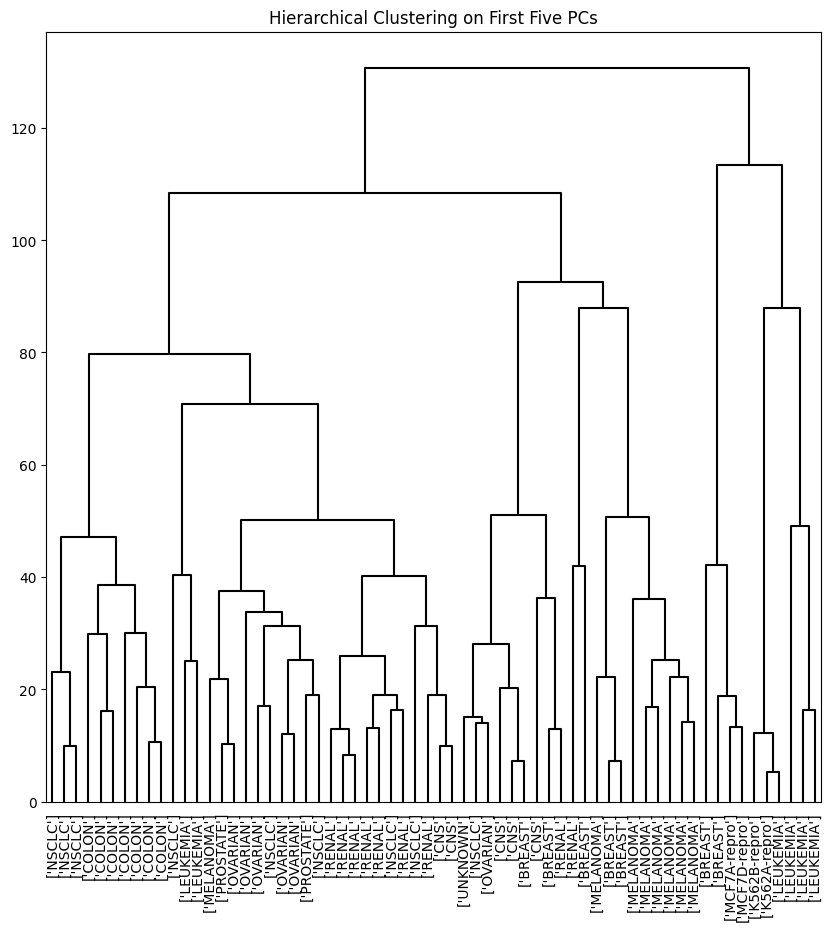

In [18]:
# Clustering on PCA scores
hc_pca = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
hc_pca.fit(nci_scores[:, :5])
linkage_pca = compute_linkage(hc_pca)
fig, ax = plt.subplots(figsize=(10, 10))
dendrogram(linkage_pca, labels=np.asarray(nci_labs), leaf_font_size=10, ax=ax,
           color_threshold=-np.inf, above_threshold_color='black')
ax.set_title("Hierarchical Clustering on First Five PCs")

pca_labels = pd.Series(cut_tree(linkage_pca, n_clusters=4).reshape(-1), name='Complete-PCA')
pd.crosstab(nci_labs['label'], pca_labels)